In [1]:
1+1

2

In [2]:
import numpy as np
import pylab as plt

import sys
sys.path.append('/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/')
from Reconstruction import *
from Plot_utilities import *
from Global_utilities import *

from Reconstruction_crop_algo import *

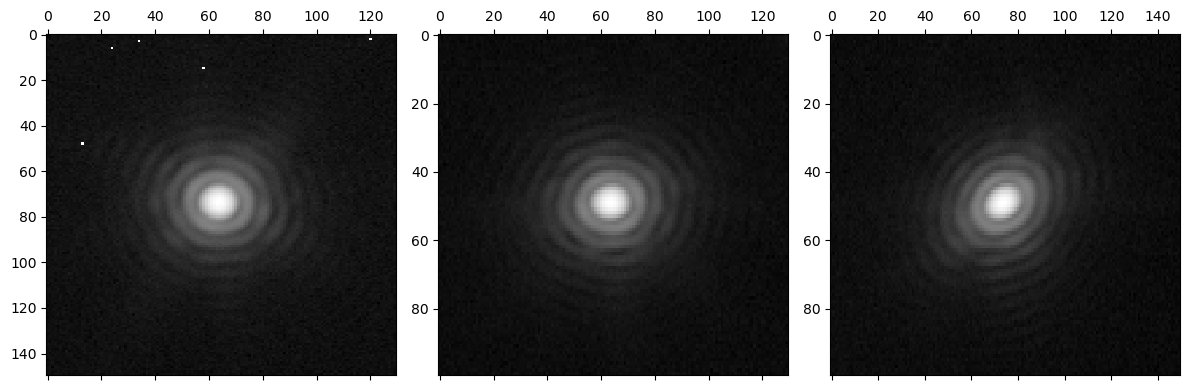

In [3]:
preprocessed_datapath = 'preprocessed_data_Pd_GC/dataset_Pd_GC_0002_scan_64.npz'


data, mask, file_dict = load_diffraction_data_Q_space(preprocessed_datapath,
                                                                          plot=True)

# Clean alien data (optional)

In [4]:
# preprocessed_datapath = preprocessed_datapath = 'preprocessed_data_P7/clean_data/dataset_P7_0001_scan_47_clean_data.npz'
# data, mask, file_dict = load_diffraction_data_Q_space(preprocessed_datapath,
#                                                                           plot=False)
# file = np.load(preprocessed_datapath)
# mask_alien = file['mask_alien']
# data = data*(1.-mask_alien)

# plot_3D_projections(data, cmap='gray', axes_labels=True)

# Remove background (optional)

In [5]:
remove_background = False
background = 3

if remove_background:
    data_clean = np.copy(data)
    data_clean = data_clean-background
    data_clean[data_clean<0] = 0
    plot_3D_projections(data_clean, cmap='gray')

In [6]:
if remove_background:
    
    additional_string = '_background{}'.format(background)
    additional_string = additional_string.replace('.','p')
    file_dict['savename_add_string'] = str(file_dict['savename_add_string'])+additional_string
    
    data = np.copy(data_clean)

# Test one reconstruction


crop_factor 3


/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/Reconstruction_crop_algo.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[s]


Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1700 LLK=   1.169[free=  1.428](p), nb photons=4.142406e+07, support:nb= 26159 ( 2.359%) <obj>=     39.79 max=    831.45, out=1.557% dt/cycle=0.0075s [PSF]

crop_factor 2


/data/id01/inhouse/bellec/software/sharedipynb/gitlab/bcdi_eb/Reconstruction_crop_algo.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[s]


support_threshold_relative 0.1229799643844904 :
using the support array given by user
  ER #1700 LLK=   0.595[free=  0.626](p), nb photons=4.191594e+07, support:nb= 28247 ( 0.754%) <obj>=     38.52 max=    922.00, out=0.684% dt/cycle=0.0073s [PSF]

final reconstruction
using the support array given by user
  ER #1700 LLK=   0.187[free=  0.195](p), nb photons=4.243631e+07, support:nb=118678 ( 0.401%) <obj>=     18.91 max=   1424.34, out=1.769% dt/cycle=0.0209s [PSF]


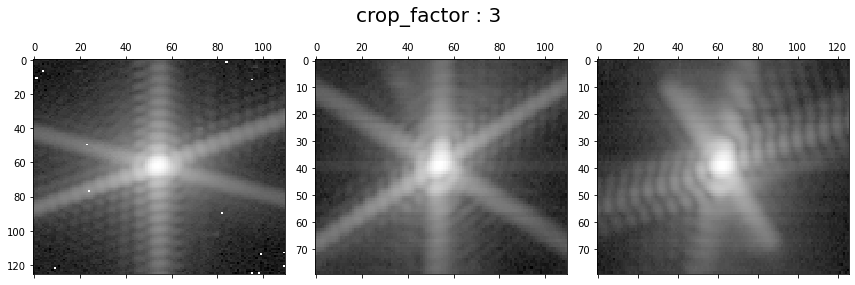

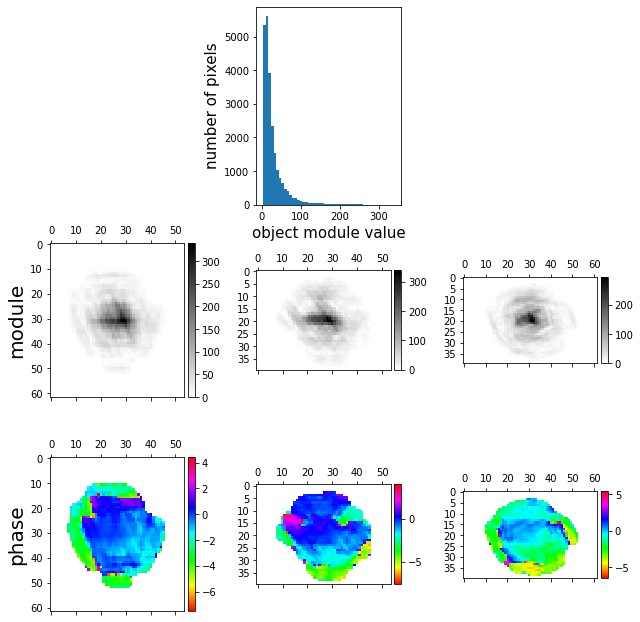

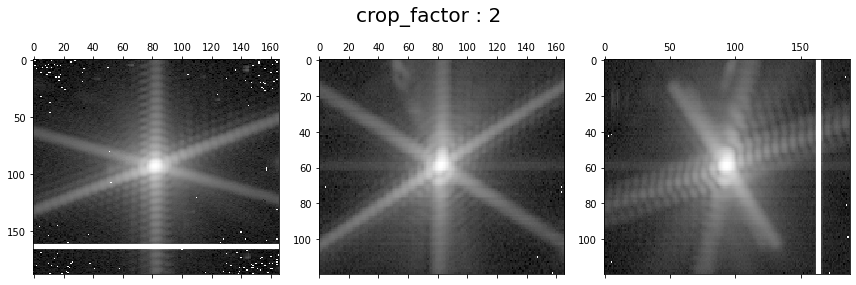

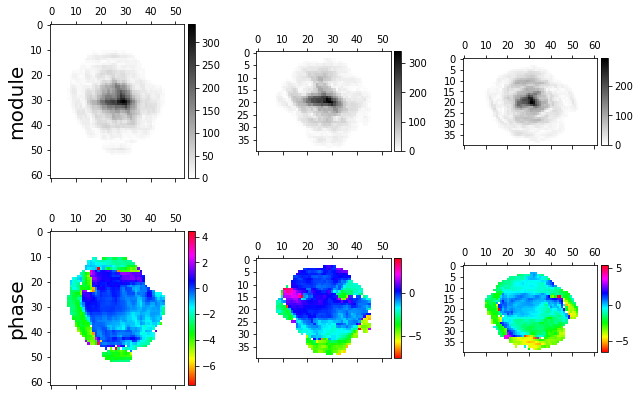

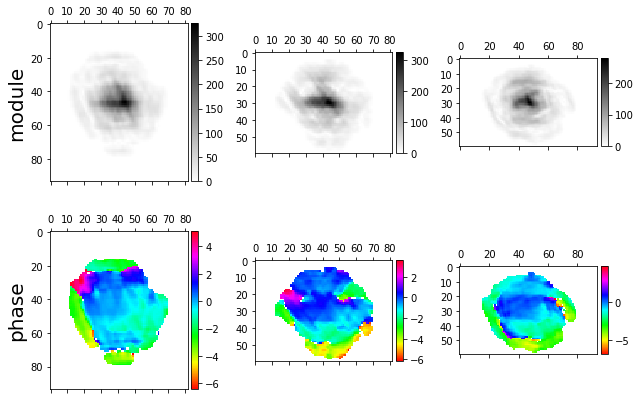

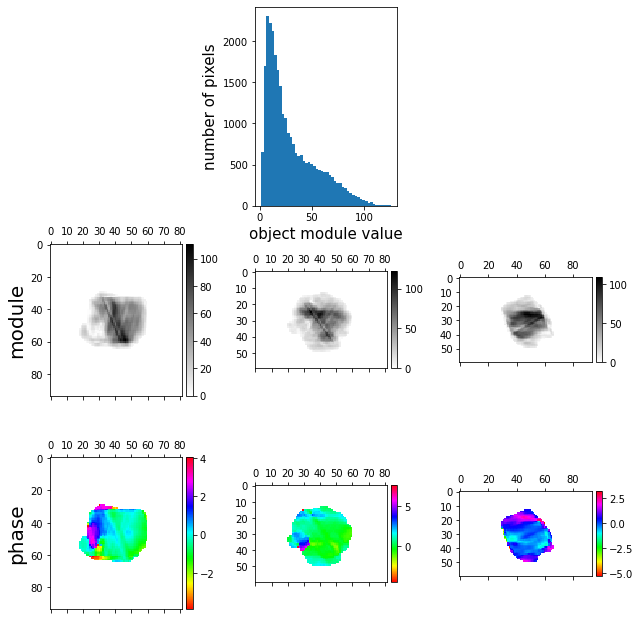

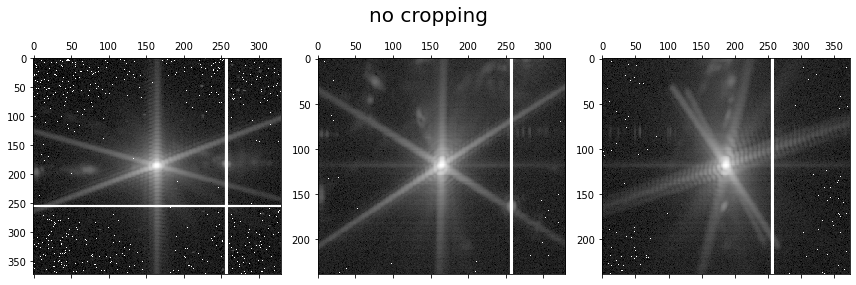

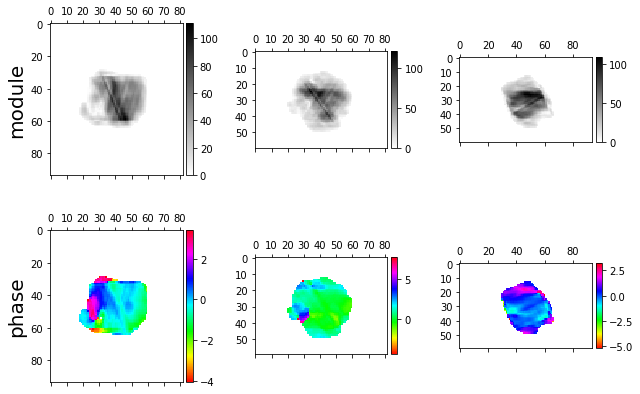

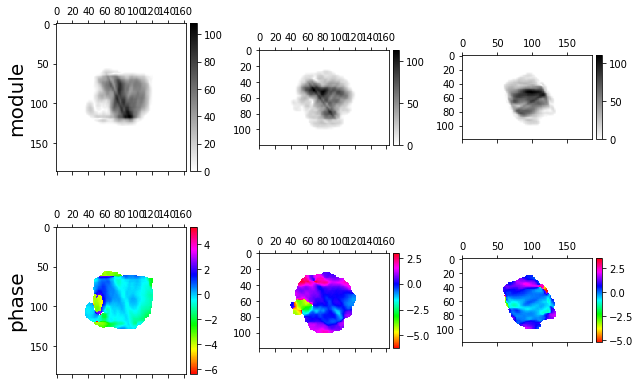

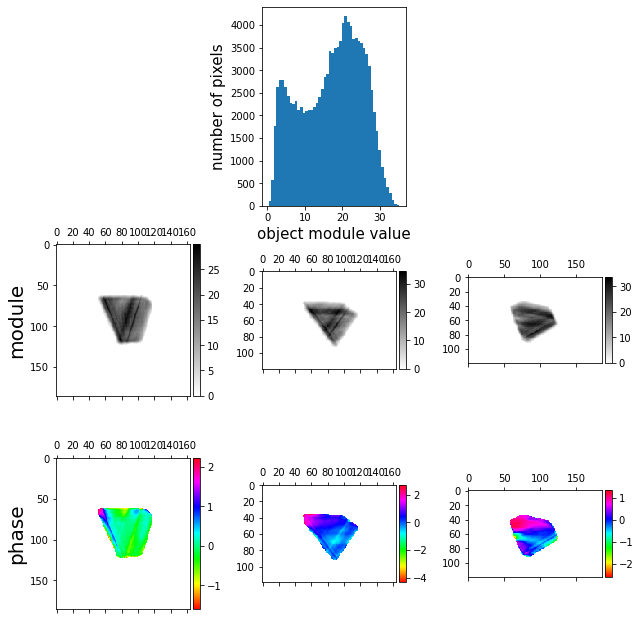

In [4]:
crop_factor_list = [2]# Careful not to crop too much for the first reconstruction
data_centering = False

obj, llk, support, return_dict = crop_scale_function(data, 
                                        crop_factor_list = crop_factor_list, 
                                        params=None, # default reconstruction parameters
                                        plot=True, verbose=True,
                                                     mask=mask_used,
                                                    data_centering=data_centering)

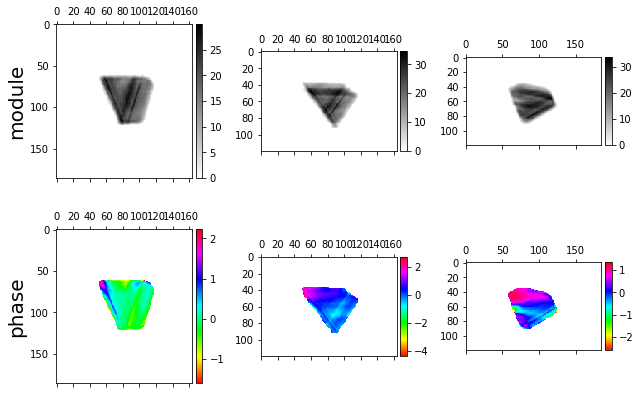

In [5]:
plot_2D_slices_middle(obj)

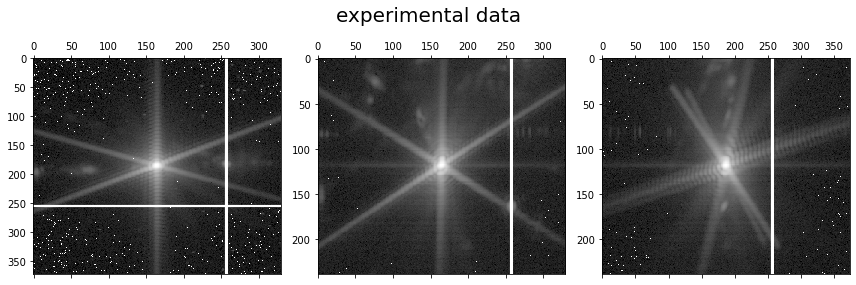

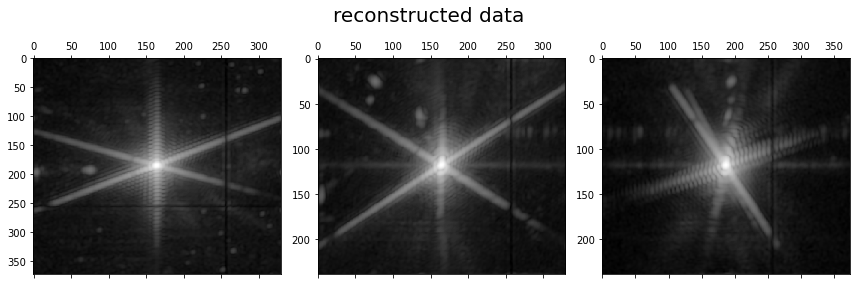

In [6]:
compare_reconstuction_to_real_data(data,obj)

# Several reconstructions

In [7]:
crop_factor_list = [2]
mask_used = None #mask_alien # None
data_centering = False

In [8]:
Nb_reconstruction = 10

make_several_reconstructions_crop_algo(data, file_dict, Nb_reconstruction, 
                                           crop_factor_list,
                                           params=None,  # default reconstruction parameters
                                           plot=False, verbose=False,
                                       mask=mask_used,
                                      data_centering=data_centering)

Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1700 LLK=   2.978[free=  4.403](p), nb photons=8.864982e+06, support:nb=  1234 ( 0.492%) <obj>=     84.76 max=    298.56, out=3.990% dt/cycle=0.0103s [PSF]
using the support array given by user
  ER #1700 LLK=   0.586[free=  0.600](p), nb photons=1.046650e+07, support:nb=  7805 ( 0.400%) <obj>=     36.62 max=    509.78, out=0.409% dt/cycle=0.0032s [PSF]


sucessfull reconstruction


Using autocorrelation as an initial support. If you're not happy, give either a support or an obj_init
using autocorrelation as support
  ER #1700 LLK=   3.250[free=  6.541](p), nb photons=8.862486e+06, support:nb=  1233 ( 0.492%) <obj>=     84.78 max=    296.33, out=3.331% dt/cycle=0.0009s [PSF]
using the support array given by user
  ER #1700 LLK=   0.585[free=  0.619](p), nb photons=1.044739e+07, support:nb=  8201 ( 0.421%) <obj>=     35.69 max=    510.20, out=0.39

# Dev